## Overview 🐜
- A set of artifical ants that can explore a search space.
- Pheromone matrix that stores the amount of pheromone deposited at each edge of the search space.
- A heuristic function that guides the ants towards promising regions of the search space.
- A set of parameters that control the pheromone evaporation, intensification, and diversification.

## Uses
- Find the optimal solution to combinatorial optimization problem, traveling salesman or vehicle routing problem.
- Each iteration, the ant moves probabalistically based on the pheromone and heuristic values.
- Pheromones are added each iteration by evaporating some pheromones and adding more to those that promise the best solutions.  

## [Visualization!](https://g.co/gemini/share/ae4e958aee46)

In [ ]:
import numpy as np

# === fitness ====
distances = np.array([])

def fitness(solution):
  # for example, total distance of a tour
  distance = 0
  for i in range(len(solution)):
    current_city = solution[i]
    next_city = solution[(i+1) % len(solution)]

    distance += distances[current_city][next_city]

  return distance

# === params ======
num_ants = 10
num_cities = 20
max_iter = 1000
alpha = 1 # Pheromone importance factor
beta = 2 # Heuristic importance factor
rho = 0.1 # Pheromone evaporation rate
q = 10 # Pheromone deposit intensity
# === environment setup ==================
distances = np.random.randint(1, 100, (num_cities, num_cities))
distances = (distances + distances.T) / 2
# initalize the pheromone matrix
pheromones = np.ones((num_cities, num_cities))

for i in range(max_iter):
  all_solutions = [] # Changed variable name to avoid confusion with individual ant's solution
  all_fitness_scores = [] # Store fitness for each ant's solution

  for j in range(num_ants):
    # Choose randome start city
    current_ant_solution = [np.random.randint(num_cities)] # Initialize with start city
    # Loop until all cities are visited
    while len(current_ant_solution) < num_cities:
      current_city = current_ant_solution[-1]
      probabilities = []
      for k in range(num_cities):
        # if city not visited calculate the new probability using pheromone and heuristic values
        if k not in current_ant_solution:
          # Correctly calculate and append the probability
          prob_val = (pheromones[current_city][k] ** alpha) * ((1 / distances[current_city][k]) ** beta)
          probabilities.append(prob_val)
        else:
          # assign zero to already visited cities.
          probabilities.append(0)

      # Check if probabilities are all zero to avoid division by zero
      sum_probabilities = np.sum(probabilities)
      if sum_probabilities == 0:
          # Handle the case where all probabilities are zero (e.g., restart ant or choose randomly)
          # For now, we'll just choose the next unvisited city randomly.
          unvisited_cities = [city for city in range(num_cities) if city not in current_ant_solution]
          if unvisited_cities:
              next_city = np.random.choice(unvisited_cities)
          else:
              # Should not happen in this logic if the while loop condition is correct
              break
      else:
          # normalize probabilities to sum up to one.
          probabilities = probabilities / sum_probabilities
          # choose next city based on probabilities
          next_city = np.random.choice(num_cities, p=probabilities)

      current_ant_solution.append(next_city)

    # After completing a tour, add the start city to complete the cycle
    current_ant_solution.append(current_ant_solution[0])

    # Evaluate fitness
    fitness_score = fitness(current_ant_solution)
    all_solutions.append(current_ant_solution)
    all_fitness_scores.append(fitness_score)

  # Find the best solution among all ants in this iteration
  best_fitness_index = np.argmin(all_fitness_scores)
  best_solution = all_solutions[best_fitness_index]
  best_fitness = all_fitness_scores[best_fitness_index]

  # update the pheromone matrix by evaporating some pheromone and depositing more pheromone on the edges that belong to the best solution.
  pheromones = (1 - rho) * pheromones # Apply evaporation to all pheromones

  # Deposit pheromones on the edges of the best solution
  for m in range(len(best_solution) - 1): # Iterate through edges of the best solution
      city1 = best_solution[m]
      city2 = best_solution[m+1]
      pheromones[city1][city2] += q / best_fitness
      # Assuming symmetric pheromone deposition for symmetric problems
      pheromones[city2][city1] += q / best_fitness


# After the loop finishes (max_iter iterations)
# Find the overall best solution across all iterations (if you were storing them)
# Since we only update based on the best in the current iteration, the last best_solution is the result.
print("Best solution:", best_solution)
print("Best fitness:", best_fitness)






Best solution: [3, 9, 10, 5, 1, 4, 7, 18, 15, 17, 13, 11, 6, 19, 8, 12, 16, 0, 2, 14, 3]
Best fitness: 450.0


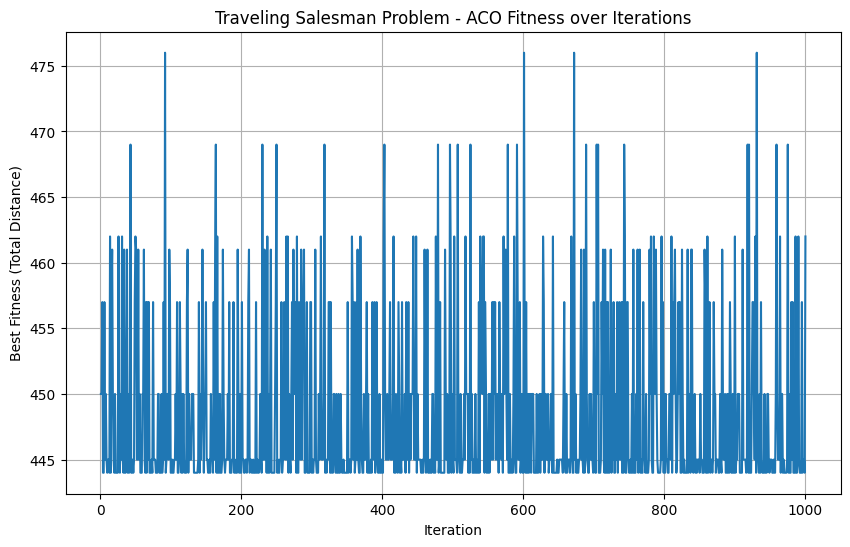

Final Best solution: [4, 7, 18, 15, 17, 13, 11, 6, 19, 8, 12, 16, 0, 2, 14, 3, 9, 10, 5, 1, 4]
Final Best fitness: 462.0


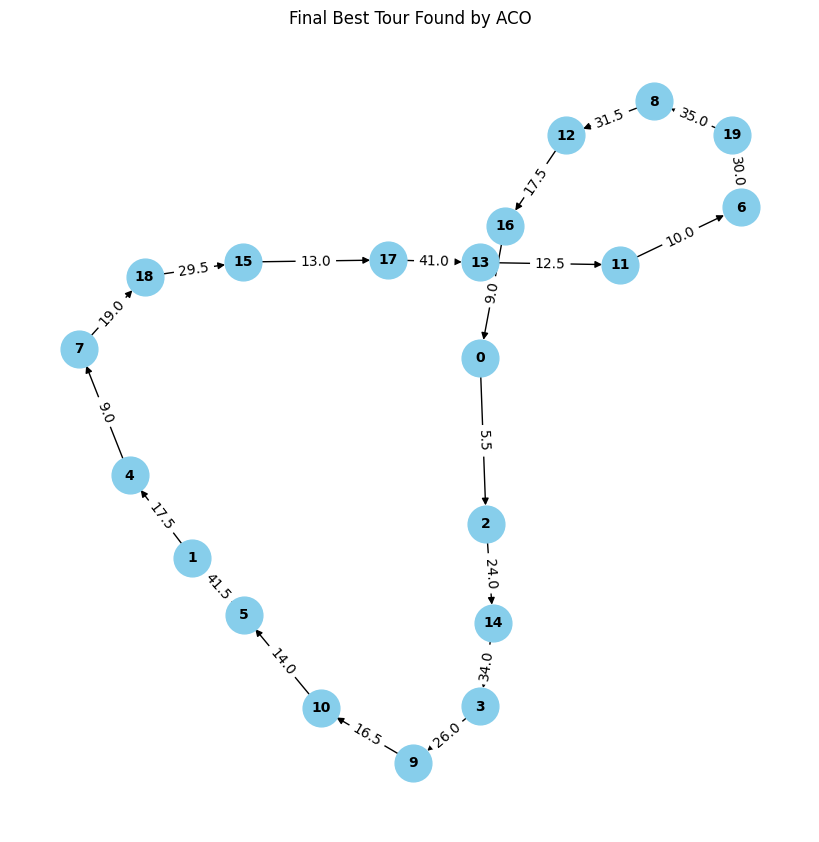

In [ ]:
# prompt: Using the Ant Colony Algorithm above lets visualize the traveling salesman problem over iterations

#!pip install matplotlib networkx
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

# Assuming the previous code block defined:
# num_cities, distances, max_iter, num_ants, alpha, beta, rho, q, fitness, pheromones

# We need to re-run the ACO loop and store the best fitness of each iteration

best_fitness_history = []

for i in range(max_iter):
    all_solutions = []
    all_fitness_scores = []

    for j in range(num_ants):
        current_ant_solution = [np.random.randint(num_cities)]
        while len(current_ant_solution) < num_cities:
            current_city = current_ant_solution[-1]
            probabilities = []
            for k in range(num_cities):
                if k not in current_ant_solution:
                    # Avoid division by zero if distance is zero
                    if distances[current_city][k] == 0:
                        prob_val = (pheromones[current_city][k] ** alpha) * (float('inf') ** beta)
                    else:
                         prob_val = (pheromones[current_city][k] ** alpha) * ((1 / distances[current_city][k]) ** beta)
                    probabilities.append(prob_val)
                else:
                    probabilities.append(0)

            sum_probabilities = np.sum(probabilities)
            if sum_probabilities == 0:
                unvisited_cities = [city for city in range(num_cities) if city not in current_ant_solution]
                if unvisited_cities:
                    next_city = np.random.choice(unvisited_cities)
                else:
                    break
            else:
                probabilities = probabilities / sum_probabilities
                next_city = np.random.choice(num_cities, p=probabilities)

            current_ant_solution.append(next_city)

    # After completing a tour, add the start city to complete the cycle
        if len(current_ant_solution) == num_cities: # Ensure all cities were visited
            current_ant_solution.append(current_ant_solution[0])

        fitness_score = fitness(current_ant_solution)
        all_solutions.append(current_ant_solution)
        all_fitness_scores.append(fitness_score)

    best_fitness_index = np.argmin(all_fitness_scores)
    best_solution = all_solutions[best_fitness_index]
    best_fitness = all_fitness_scores[best_fitness_index]

    # Store the best fitness of this iteration
    best_fitness_history.append(best_fitness)

    pheromones = (1 - rho) * pheromones

    # Ensure best_solution has at least two nodes before trying to deposit pheromones
    if len(best_solution) > 1:
      for m in range(len(best_solution) - 1):
          city1 = best_solution[m]
          city2 = best_solution[m+1]
          # Avoid division by zero if best_fitness is zero (unlikely with distances >= 1)
          if best_fitness > 0:
              pheromones[city1][city2] += q / best_fitness
              pheromones[city2][city1] += q / best_fitness


# Plot the fitness over iterations
plt.figure(figsize=(10, 6))
plt.plot(range(1, max_iter + 1), best_fitness_history)
plt.xlabel('Iteration')
plt.ylabel('Best Fitness (Total Distance)')
plt.title('Traveling Salesman Problem - ACO Fitness over Iterations')
plt.grid(True)
plt.show()

# Optional: Visualize the final best tour
print("Final Best solution:", best_solution)
print("Final Best fitness:", best_fitness)

# Create a graph for visualization
G = nx.DiGraph() # Use DiGraph for directed edges

# Add nodes (cities)
for i in range(num_cities):
    G.add_node(i)

# Add edges from the best solution tour
if len(best_solution) > 1:
    for i in range(len(best_solution) - 1):
        city1 = best_solution[i]
        city2 = best_solution[i+1]
        G.add_edge(city1, city2, weight=distances[city1][city2])

# Define positions for nodes (e.g., random layout for illustration)
pos = nx.spring_layout(G)

# Draw the graph
plt.figure(figsize=(8, 8))
nx.draw(G, pos, with_labels=True, node_size=700, node_color='skyblue', font_size=10, font_weight='bold')

# Draw edge labels (distances)
edge_labels = {(u, v): d['weight'] for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.title("Final Best Tour Found by ACO")
plt.show()